In [1]:
import numpy as np
import time

# Parametros del la simulación
n_3     = 0.1
divisor = 40

#Diametro de las particulas
sigma_3 = 1.0
sigma_1 = 10.0  * sigma_3
        
# Dimensiones del sistema
r       = np.linspace(0,1.5,16)*sigma_3
delta_x = sigma_3/divisor
        
# Elementos del mallado
x       = np.arange( sigma_1/2 - 3*sigma_3 , sigma_1/2 + 4*sigma_3 , delta_x)
y       = np.arange(     -4*sigma_3        ,      4*sigma_3        , delta_x)

# Arrays del mallado
xx, yy = np.meshgrid(x, y, sparse=True)

# Ubicación de las esferas 2
X_1      = np.array([0,0])

# Diametros posibles de la esfera 1 
sigma_2  = np.linspace(2,10,5)* sigma_3

In [17]:
# Verificar velocidad de ejecución
inicio = time.time()

#Inicializar donde se guardara el número de traslapes
num_tras = np.zeros((len(sigma_2),len(r)))

#Calcular iterativamente todos los valores de los traslapes
for j in range(len(sigma_2)):
    for i in range(len(r)):   
        # Ubicación de las esferas 1
        X_2           = np.array([(sigma_1+sigma_2[j])/2 + r[i],0])
                      
        #Arrays con la distancia entre las esferas y cada punto del mallado
        d1            = np.sqrt( (X_1[0]-xx)**2 + (X_1[1]-yy)**2 )
                      
        # Filtros que identifican si hay traslape entre los circulos grandes 
        # y las pequeñas del mallado. Son un array de booleanos
        mask_1        = d1 <= (sigma_1+sigma_3)/2       
                      
        # Eliminar un gran array para ahorrar memoria 
        del(d1)       
                      
        #Repetir para la esfera 2
        d2            = np.sqrt( (X_2[0]-xx)**2 + (X_2[1]-yy)**2 )
        d2            = d2[mask_1]
        mask_2        = d2 <= (sigma_2[j]+sigma_3)/2
                       
        del(d2,mask_1)
        # Número de elementos con traslape de ambas esferas
        num_tras[j,i] = len(mask_2[mask_2])
        del(mask_2)


# Medir cuanto dura el proceso con finalidades de optimización
fin = time.time()
print(fin-inicio) 


# Guardar los resultados en un documento csv
beta_u_ef =  -num_tras*n_3*(delta_x**2)
np.savetxt("beta_u_cir_delta_x_"+str(divisor)+"_s_2.csv", beta_u_ef, delimiter=",")

0.060030460357666016


In [11]:
def beta_u_fun(n_3,sigma_3,sigma_1,sigma_2,r):
    phi_3     = n_3 * (sigma_3**2) * np.pi / 4 
    eta_1     = sigma_1/sigma_3
    eta_2     = sigma_2/sigma_3

    resultado = np.zeros(len(r))

    for i in range(len(r)):
        R_red        = r[i] + (sigma_1 + sigma_2) / 2
        r_1          = (sigma_3/(4*R_red)) * (  4*(R_red/sigma_3)**2 + ( 1+eta_1 )**2 - (1+eta_2)**2 )
        r_2          = (2*R_red)/sigma_3 -r_1

        if r[i] > sigma_3: 
            resultado[i] = 0
        else:
            resultado[i] = (- (phi_3/np.pi) * (1+eta_1)**2 * ( np.arccos( r_1/(1+eta_1) ) - (r_1/(1+eta_1))*np.sqrt( 1 - ( r_1/( 1+eta_1 ))**2 ) ) 
                            - (phi_3/np.pi) * (1+eta_2)**2 * ( np.arccos( r_2/(1+eta_2) ) - (r_2/(1+eta_2))*np.sqrt( 1 - ( r_2/( 1+eta_2 ))**2 ) ) )
        
    return    resultado

In [20]:
beta_u_delta_x_5  = np.loadtxt("beta_u_cir_delta_x_5_s_2.csv",  delimiter=",")
beta_u_delta_x_10 = np.loadtxt("beta_u_cir_delta_x_10_s_2.csv", delimiter=",")
beta_u_delta_x_15 = np.loadtxt("beta_u_cir_delta_x_15_s_2.csv", delimiter=",")
beta_u_delta_x_20 = np.loadtxt("beta_u_cir_delta_x_20_s_2.csv", delimiter=",")
beta_u_delta_x_25 = np.loadtxt("beta_u_cir_delta_x_25_s_2.csv", delimiter=",")
beta_u_delta_x_30 = np.loadtxt("beta_u_cir_delta_x_30_s_2.csv", delimiter=",")
beta_u_delta_x_35 = np.loadtxt("beta_u_cir_delta_x_35_s_2.csv", delimiter=",")
beta_u_delta_x_40 = np.loadtxt("beta_u_cir_delta_x_40_s_2.csv", delimiter=",")

std_x_5   = 0; std_x_10  = 0; std_x_15  = 0; std_x_20  = 0
std_x_25  = 0; std_x_30  = 0; std_x_35  = 0; std_x_40  = 0
               
for j in range(len(sigma_2)):
    std_x_5   += np.sum( (beta_u_delta_x_5[j]  - beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r) )**2 )
    std_x_10  += np.sum( (beta_u_delta_x_10[j] - beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r) )**2 )
    std_x_15  += np.sum( (beta_u_delta_x_15[j] - beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r) )**2 )
    std_x_20  += np.sum( (beta_u_delta_x_20[j] - beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r) )**2 )
    std_x_25  += np.sum( (beta_u_delta_x_25[j] - beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r) )**2 )
    std_x_30  += np.sum( (beta_u_delta_x_30[j] - beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r) )**2 )
    std_x_35  += np.sum( (beta_u_delta_x_35[j] - beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r) )**2 )
    std_x_40  += np.sum( (beta_u_delta_x_40[j] - beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r) )**2 )
               
std_x_5        = np.sqrt( std_x_5  / (len(sigma_2)*len(r)) )
std_x_10       = np.sqrt( std_x_10 / (len(sigma_2)*len(r)) )
std_x_15       = np.sqrt( std_x_15 / (len(sigma_2)*len(r)) )
std_x_20       = np.sqrt( std_x_20 / (len(sigma_2)*len(r)) )
std_x_25       = np.sqrt( std_x_25 / (len(sigma_2)*len(r)) )
std_x_30       = np.sqrt( std_x_30 / (len(sigma_2)*len(r)) )
std_x_35       = np.sqrt( std_x_35 / (len(sigma_2)*len(r)) )
std_x_40       = np.sqrt( std_x_40 / (len(sigma_2)*len(r)) )    

print('La deviación estándar de sigma_5  =',std_x_5 )
print('La deviación estándar de sigma_10 =',std_x_10)
print('La deviación estándar de sigma_15 =',std_x_15)
print('La deviación estándar de sigma_20 =',std_x_20)
print('La deviación estándar de sigma_25 =',std_x_25)
print('La deviación estándar de sigma_30 =',std_x_30)
print('La deviación estándar de sigma_35 =',std_x_35)
print('La deviación estándar de sigma_40 =',std_x_40)

La deviación estándar de sigma_5  = 0.005568309149343552
La deviación estándar de sigma_10 = 0.005425221075927274
La deviación estándar de sigma_15 = 0.0012430248833742632
La deviación estándar de sigma_20 = 0.002354305201718065
La deviación estándar de sigma_25 = 0.00040531921924495136
La deviación estándar de sigma_30 = 0.0009520129821870521
La deviación estándar de sigma_35 = 0.00036442269315587123
La deviación estándar de sigma_40 = 0.000772044594623375


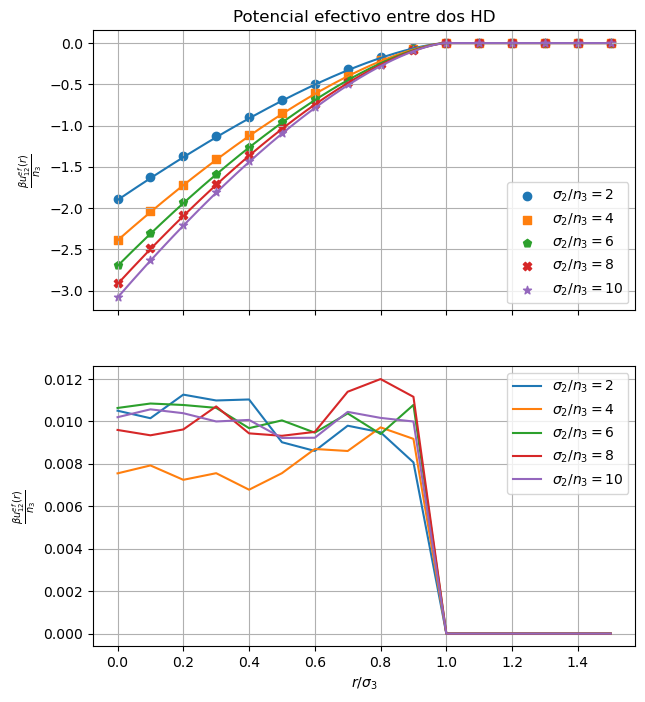

In [21]:
import matplotlib.pyplot as plt

beta_u_ef = np.loadtxt("beta_u_cir_delta_x_40_s_2.csv",
				                 delimiter=",")
beta_u_ef = beta_u_ef/n_3

fig, axs = plt.subplots(2,1, sharex=True,figsize=[7, 8])

r1  = np.linspace(0,1.5,1000)*sigma_3

markers = ['o','s','p',"X","*"]
for j in range(len(sigma_2)):
    axs[0].scatter( r , beta_u_ef[j], label=r'$\sigma_2/n_3=$'+str(int(sigma_2[j])), marker= markers[j])
    axs[0].plot(   r1 , beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r1)/n_3 )
    
    axs[1].plot(r, beta_u_ef[j]- beta_u_fun( n_3,sigma_3,sigma_1,sigma_2[j],r)/n_3, label=r'$\sigma_2/n_3=$'+str(int(sigma_2[j])) )

axs[0].set_title('Potencial efectivo entre dos HD')
axs[0].set_ylabel(r'$\frac{\beta u_{12}^{ef}(r)}{n_3}$')
axs[1].set_ylabel(r'$\frac{\beta u_{12}^{ef}(r)}{n_3}$')
axs[1].set_xlabel(r'$r / \sigma_3$')
axs[0].legend()
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)
plt.savefig("Grafico_discos_s_2.png", dpi=500)
plt.show()